In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

In [59]:
data_2010 = pd.read_csv('Failure_modelling/Failure_Data/failures_2010.csv', delimiter=';')
data_2011 = pd.read_csv('Failure_modelling/Failure_Data/failures_2011.csv', delimiter=';')
data_2012 = pd.read_csv('Failure_modelling/Failure_Data/failures_2012.csv', delimiter=';')
data_2013 = pd.read_csv('Failure_modelling/Failure_Data/failures_2013.csv', delimiter=';')
data_2014 = pd.read_csv('Failure_modelling/Failure_Data/failures_2014.csv', delimiter=';')
data_2015 = pd.read_csv('Failure_modelling/Failure_Data/failures_2015.csv', delimiter=';')
data_2016 = pd.read_csv('Failure_modelling/Failure_Data/failures_2016.csv', delimiter=';')
data_2017 = pd.read_csv('Failure_modelling/Failure_Data/failures_2017.csv', delimiter=';')
data_2018 = pd.read_csv('Failure_modelling/Failure_Data/failures_2018.csv', delimiter=';')
data_2019 = pd.read_csv('Failure_modelling/Failure_Data/failures_2019.csv', delimiter=';')
data = pd.concat([data_2010, data_2011, data_2012, data_2013, data_2014, data_2015, data_2016, data_2017, data_2018, data_2019], axis=0)
data = data.reset_index()
display(data)


,index,Unnamed: 0,relatie_code,storing_idnummer,storing_melddatum,storing_medium,storing_materiaal,storing_type,storing_type_hulpstuk,storing_aanlegjaar,...,storing_verkeersdrempels,storing_drempelafstand,storing_verschijningsvorm,storing_bescherminginwendig,storing_soortoorzaak,storing_oorzaak1spontanestoring,storing_oorzaak2spontanestoring,storing_oorzaakinternebedrijfsvoering,storing_storendobject,Unnamed: 29
0,0,418,C,-,2010-03-05,-,MAT_GG,TYP_LMOF,-,1975,...,-,-,-,BI_GG_GEEN,ORZ_SPONTAAN,NaN,NaN,NaN,BUIS,NaN
1,1,978,B,-,2010-06-03,-,MAT_ST,-,-,1954,...,-,-,BUIS_AND,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,-,NaN
2,2,359,A,-,2010-02-24,-,MAT_PVC,-,-,1990,...,-,-,BUIS_SCHERF,-,ORZ_SPONTAAN,NaN,NaN,NaN,BUIS,NaN
3,3,2049,B,-,2010-09-29,-,MAT_ST,-,-,-1,...,-,-,BUIS_PUNTLEK,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,BUIS,NaN
4,4,444,A,-,2010-03-10,-,MAT_AC,TYP_NTRV_STEEK,-,1960,...,-,-,VERB_SCHUIF,-,ORZ_SPONTAAN,ORZ_SPON1_UITWBEL,NaN,NaN,VERB,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,128,165,B,-1,2019-01-27,DW,MAT_GG,NaN,-,1934,...,DREMP_ONB,-,BUIS_RONDBR,BI_GG_GEEN,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN
2306,129,2228,B,50478342,2019-12-09,DW,MAT_AC,NaN,-,1976,...,DREMP_ONB,-,BUIS_LENGTES,-,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN
2307,130,1611,B,50471369,2019-09-09,DW,MAT_ST,NaN,-,1973,...,DREMP_ONB,-,BUIS_PUNTLEK,BI_ST_ONB,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN
2308,131,2231,B,50478354,2019-12-09,DW,MAT_AC,NaN,-,1973,...,DREMP_ONB,-,BUIS_SCHERF,-,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN


In [67]:
data_spontaneous_cause = data[data['storing_soortoorzaak'] == 'ORZ_SPONTAAN'] #Filter on only spontaneous failures becasue we are interesed in detererioration failure modelling
data_good_construction_year = data_spontaneous_cause[data_spontaneous_cause['storing_aanlegjaar'] != -1] #Cannot know identirfy age of pipe if construction year is unknown
data_good_construction_year.loc[:,'storing_melddatum'] = pd.to_datetime(data_good_construction_year.loc[:,'storing_melddatum'], format='%Y-%m-%d')
data_good_construction_year.loc[:,'storing_aanlegjaar'] = pd.to_datetime(data_good_construction_year.loc[:,'storing_aanlegjaar'], format='%Y')
data_good_construction_year.loc[:,'age_at_failure'] = (pd.to_datetime(data_good_construction_year.loc[:,'storing_melddatum'], format='%Y-%m-%d').values - pd.to_datetime(data_good_construction_year.loc[:,'storing_aanlegjaar'], format='%Y').values) /  pd.Timedelta(days=365.25)
data_good_construction_year.loc[:,'construction_year_vs_graph_year'] = (pd.to_datetime(['2020']*len(data_good_construction_year.loc[:,'storing_aanlegjaar']), format='%Y') - pd.to_datetime(data_good_construction_year.loc[:,'storing_aanlegjaar'], format='%Y').values) /  pd.Timedelta(days=365.25)

(1 - (len(data_good_construction_year) / len(data)))*100

C:\Users\Jip\AppData\Local\Temp\ipykernel_4692\3288558580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_good_construction_year.loc[:,'age_at_failure'] = (pd.to_datetime(data_good_construction_year.loc[:,'storing_melddatum'], format='%Y-%m-%d').values - pd.to_datetime(data_good_construction_year.loc[:,'storing_aanlegjaar'], format='%Y').values) /  pd.Timedelta(days=365.25)
C:\Users\Jip\AppData\Local\Temp\ipykernel_4692\3288558580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_good_constr

19.826839826839826

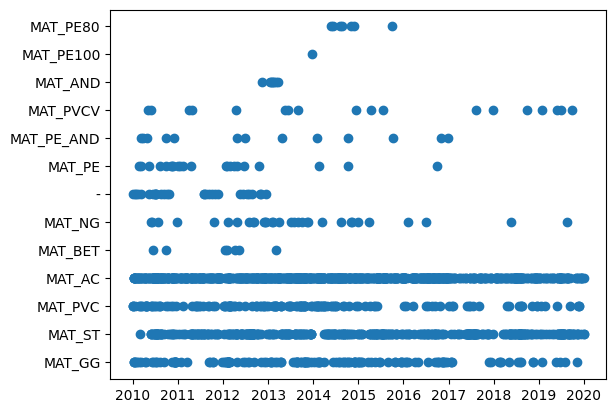

In [58]:
data = data_good_construction_year.copy()
plt.scatter(x=data['storing_melddatum'], y=data['storing_materiaal'])


In [46]:
data_pipes = pd.read_csv(
    "Failure_modelling/Failure_Data/2024_processed_leidingen_glisexport.csv",
    delimiter=";",
    index_col=0,
)
# data_pipes_length_per_construction_year = pd.DataFrame(data_pipes['Lengte'].groupby(data_pipes['Aanlegjaar']).sum())
# data_pipes_length_per_construction_year_corrected = data_pipes_length_per_construction_year[data_pipes_length_per_construction_year.index > 2] #Filter out construction years -1 and 1
# data_pipes_length_per_construction_year_corrected.index = pd.to_datetime(data_pipes_length_per_construction_year_corrected.index, format='%Y')
# data_pipes_length_per_construction_year_corrected

,Lengte
Aanlegjaar,
1802-01-01,18.557837
1852-01-01,6121.326000
1853-01-01,5265.449000
1855-01-01,70.961000
1868-01-01,104.563000
...,...
2014-01-01,245974.383492
2015-01-01,164622.774314
2016-01-01,123920.290723


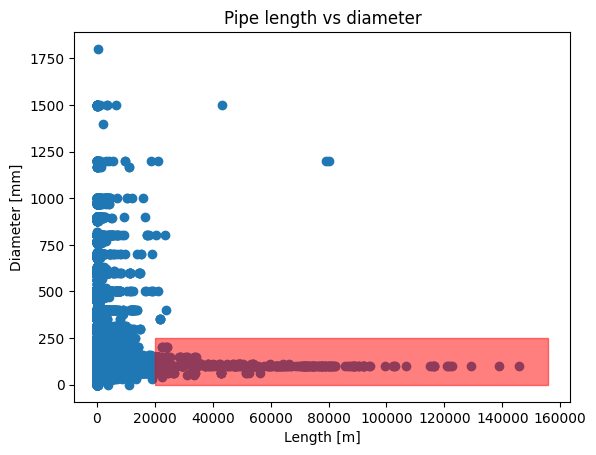

In [47]:
plt.scatter(x=data_pipes['Lengte'], y=data_pipes['Diameter'])
plt.xlabel('Length [m]')
plt.ylabel('Diameter [mm]')

x_vertices = [20000, data_pipes['Lengte'].max()+10000, data_pipes['Lengte'].max()+10000, 20000]
y_vertices = [250, 250, data_pipes['Diameter'].min(), data_pipes['Diameter'].min()]

plt.fill(x_vertices, y_vertices, color='red', alpha=0.5)
plt.title('Pipe length vs diameter')
plt.show()


In [48]:
data_pipes_length_corrected = data_pipes[~((data_pipes['Lengte'] > 20000) & (data_pipes['Diameter'] < 250))]
data_pipes_year_corrected = data_pipes_length_corrected[data_pipes_length_corrected['Aanlegjaar'] > 1]

0.6405975612772341

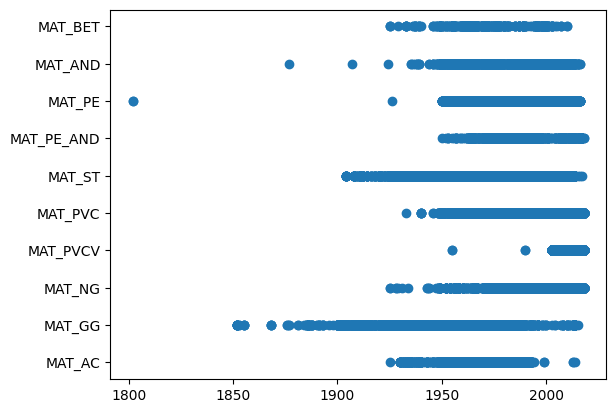

In [66]:
plt.scatter(x=data_pipes_year_corrected['Aanlegjaar'], y=data_pipes_year_corrected['Materiaalcode'])
data_pipes_material_corrected = data_pipes_year_corrected[~((data_pipes_year_corrected['Materiaalcode'] == 'MAT_PE') & (data_pipes_year_corrected['Aanlegjaar'] < 1898))]
(1 - (len(data_pipes_material_corrected) / len(data_pipes))) * 100